# Algoritmos de optimización - Reto 2

Nombre: José Manuel Pérez Utrilla <br>
Github: https://github.com/perezuj5/AlgoritmosOptimizacion/blob/main/Algoritmos_R2.ipynb <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

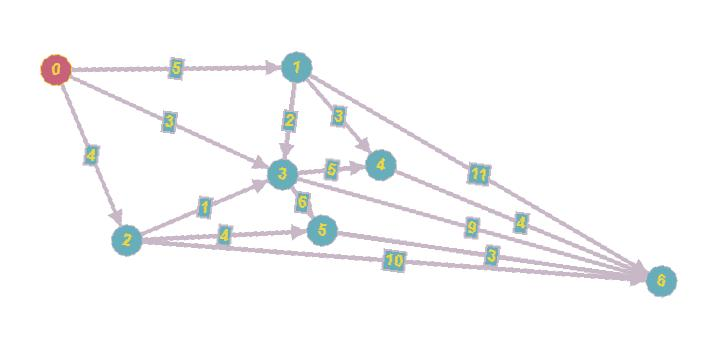

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [12]:
#Viaje por el rio - Programación dinámica
################################################################################
import heapq

def costo_minimo_dijkstra(precios):
    """
    Encuentra el costo mínimo para viajar desde el embarcadero 0 hasta el embarcadero n-1
    usando el algoritmo de Dijkstra.
    
    Parámetros:
    precios: Matriz de n x n donde precios[i][j] es el costo directo de ir del embarcadero i al j.
             Si no hay conexión directa, el valor será infinito (float('inf')).
    
    Retorna:
    Un par (costo_min, ruta) donde:
    - costo_min es el costo mínimo para ir del embarcadero 0 al n-1
    - ruta es la lista de embarcaderos que forman la ruta óptima
    """
    n = len(precios)
    
    # Inicializamos distancias como infinito excepto para el origen
    distancias = [float('inf')] * n
    distancias[0] = 0
    
    # Para reconstruir la ruta
    previo = [-1] * n
    
    # Cola de prioridad para Dijkstra [(distancia, nodo)]
    cola_prioridad = [(0, 0)]  # (distancia, nodo)
    
    # Conjunto de nodos visitados
    visitados = set()
    
    while cola_prioridad:
        # Extraemos el nodo con menor distancia actual
        dist_actual, actual = heapq.heappop(cola_prioridad)

        # Si ya procesamos este nodo, continuamos
        if actual in visitados:
            continue
        
        # Marcamos como visitado
        visitados.add(actual)
        
        # Si llegamos al destino, terminamos
        if actual == n-1:
            break
        
        # Exploramos los vecinos (solo los que están río abajo)
        for vecino in range(actual+1, n):
            # Si existe una conexión directa
            if precios[actual][vecino] < float('inf'):
                # Calculamos la nueva distancia
                nueva_dist = dist_actual + precios[actual][vecino]
                
                # Si encontramos un camino más corto
                if nueva_dist < distancias[vecino]:
                    distancias[vecino] = nueva_dist
                    previo[vecino] = actual
                    heapq.heappush(cola_prioridad, (nueva_dist, vecino))
    
    # Reconstruimos la ruta
    if distancias[n-1] == float('inf'):
        return float('inf'), []  # No hay ruta
    
    ruta = []
    actual = n-1
    while actual != -1:
        ruta.append(actual)
        actual = previo[actual]
    
    # Invertimos la ruta para que vaya desde el origen hasta el destino
    ruta.reverse()
    
    return distancias[n-1], ruta

if __name__ == "__main__":
    # Usamos el mismo ejemplo que antes
    n = 7  # Número de embarcaderos
    precios = [[float('inf')] * n for _ in range(n)]
    
    # El precio para ir del mismo embarcadero a sí mismo es 0
    for i in range(n):
        precios[i][i] = 0
    # Datos del problema
    precios[0][1] = 5
    precios[0][2] = 4
    precios[0][3] = 3
    precios[1][3] = 2
    precios[1][4] = 3
    precios[2][3] = 1
    precios[2][5] = 4
    precios[2][6] = 10
    precios[3][4] = 5
    precios[3][5] = 6
    precios[3][6] = 9
    precios[4][6] = 4
    precios[5][6] = 3

    # Encontrar la ruta más barata para ir de primeroa ultimo
    costo_min, ruta = costo_minimo_dijkstra(precios)
    print("Costo mínimo = ",costo_min)
    print("Ruta óptima = ", ruta)


Costo mínimo =  11
Ruta óptima =  [0, 2, 5, 6]


## Descenso del gradiente

In [14]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [25]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

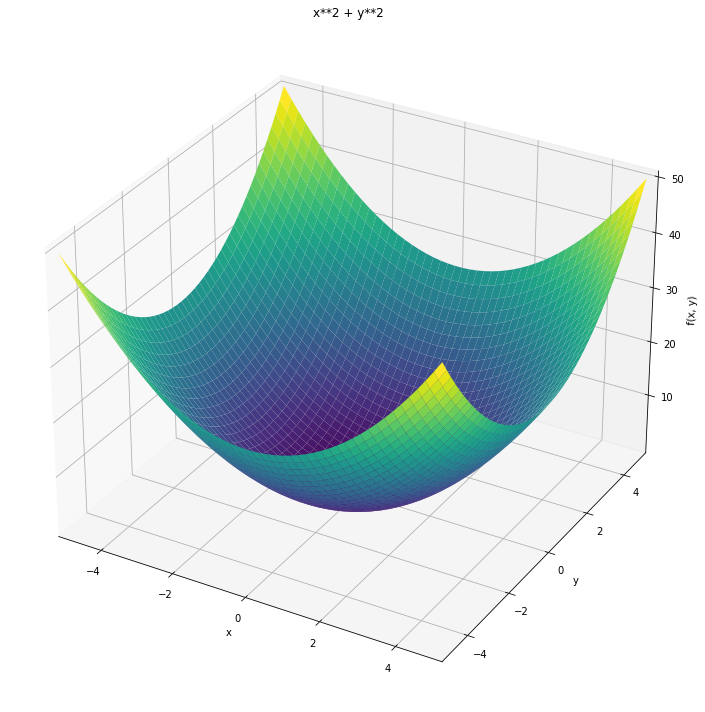

In [26]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

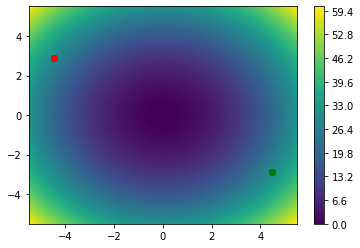

Solucion: [4.472126877392311, -2.888208824237993] 28.341669019900912


In [31]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
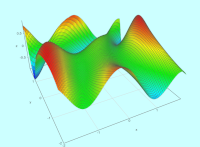


[-0.880374555079166, 3.9384502467765348]


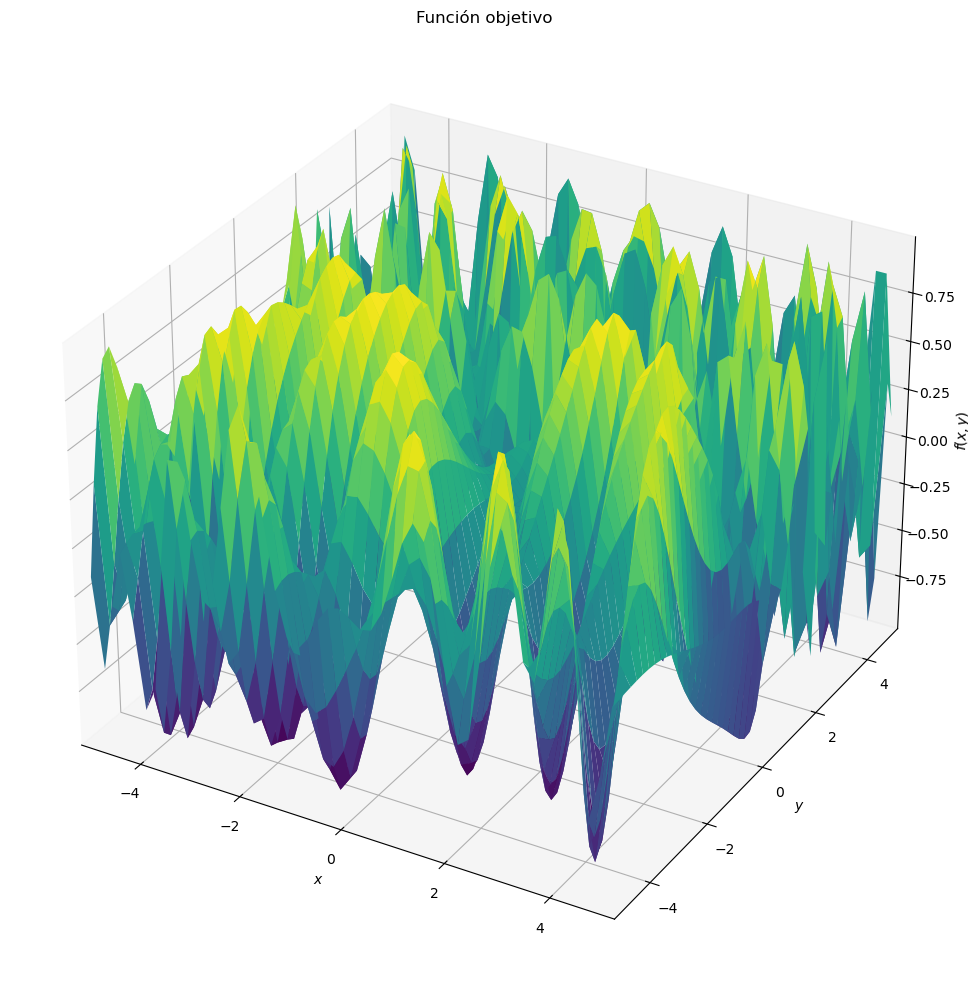

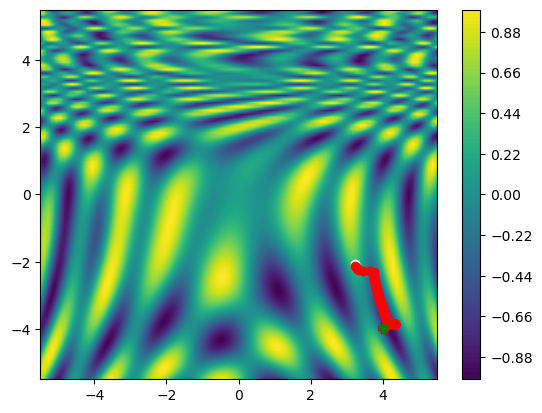

Solución: [3.9962450519448005, -3.981668533968919] -0.6058069977290493


In [18]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import symbols, exp, sin, cos
from sympy.plotting import plot3d


# Definimos la función y su gradiente
f = lambda X: math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Definimos su gradiente
df = lambda X: [
    X[0] * math.cos(2*X[0] + 1 - math.exp(X[1])) * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) - 
    2 * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3),
    -0.5 * X[1] * math.cos(2*X[0] + 1 - math.exp(X[1])) * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) + 
    math.exp(X[1]) * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3)
]

# Evaluamos el gradiente en un punto de prueba
print(df([1,2]))

# Visualización 3D
x, y = symbols('x y')
plot3d(sin(0.5*x**2 - 0.25*y**2 + 3) * cos(2*x + 1 - exp(y)), (x, -5, 5), (y, -5, 5), title='Función objetivo', size=(10,10))

# Preparar datos para el mapa de niveles
resolucion = 100
rango = 5.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pintamos el mapa de niveles
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje fija
TA = 0.1

# Iteraciones para el descenso del gradiente
for _ in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final en verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solución:", P, f(P))
